# Restaurant Rating Prediction

## Task : 
    
Predict Restaurent Ratings

## Objective : 

Build a machine learning model to predict the aggregate rating of a restaurant based on other features.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Loading Dataset and Print 5 Rows of Data

In [2]:
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Preprocessing and Splitting

In [3]:
# check for null values
dataset.isna().sum()
# remove null value 
dataset= dataset.dropna()
dataset.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
dataset.shape

(9542, 21)

In [5]:
dataset = dataset.drop(['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude', 'Latitude','Cuisines','Currency'],axis=1)

In [6]:
dataset.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,1.804968,2.665238,156.772060
std,16128.743876,0.905563,1.516588,430.203324
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,130.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9542 non-null   int64  
 1   Has Table booking     9542 non-null   object 
 2   Has Online delivery   9542 non-null   object 
 3   Is delivering now     9542 non-null   object 
 4   Switch to order menu  9542 non-null   object 
 5   Price range           9542 non-null   int64  
 6   Aggregate rating      9542 non-null   float64
 7   Rating color          9542 non-null   object 
 8   Rating text           9542 non-null   object 
 9   Votes                 9542 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 820.0+ KB


In [8]:
#Encoding The data
le = LabelEncoder()
dataset['Has Table booking'] = le.fit_transform(dataset['Has Table booking'])
dataset['Has Online delivery'] = le.fit_transform(dataset['Has Online delivery'])
dataset['Is delivering now'] = le.fit_transform(dataset['Is delivering now'])
dataset['Switch to order menu'] = le.fit_transform(dataset['Switch to order menu'])
dataset['Rating color'] = le.fit_transform(dataset['Rating color'])
dataset['Rating text'] = le.fit_transform(dataset['Rating text'])

In [9]:
dataset

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


In [10]:
dataset.shape

(9542, 10)

## Ploting of Aggregate rating

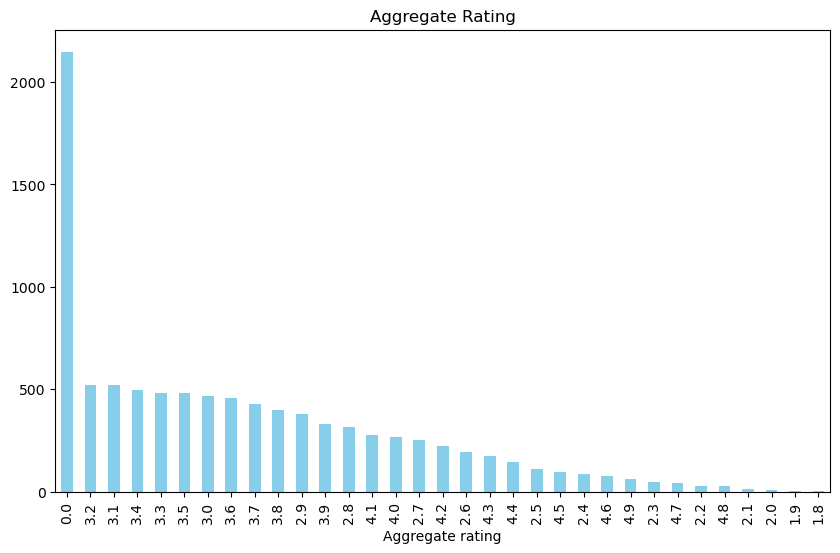

In [11]:
dataset['Aggregate rating'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Aggregate Rating')
plt.show()

## Distribution of Aggregate rating

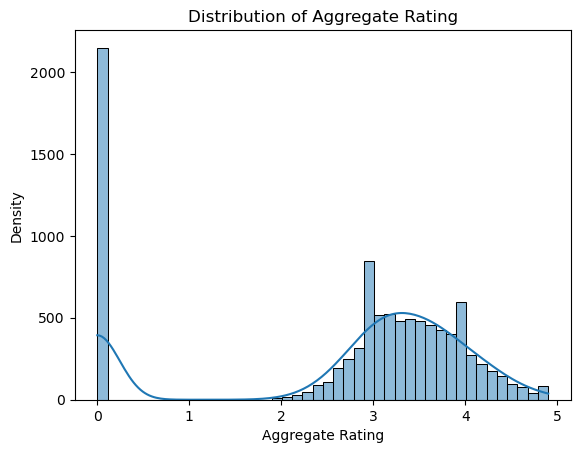

In [12]:
sns.histplot(dataset['Aggregate rating'], kde=True)
plt.xlabel('Aggregate Rating') 
plt.ylabel('Density') 
plt.title('Distribution of Aggregate Rating') 
plt.show()

## Scatter Plot of Aggregate Rating Vs Votes

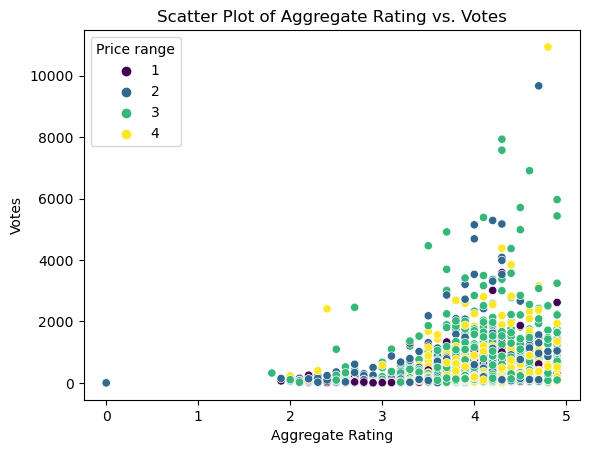

In [13]:
sns.scatterplot(x=dataset["Aggregate rating"], y=dataset["Votes"], hue=dataset["Price range"], palette="viridis")
plt.xlabel('Aggregate Rating')  
plt.ylabel('Votes')  
plt.title('Scatter Plot of Aggregate Rating vs. Votes') 
plt.show()


In [14]:
x = dataset.drop('Aggregate rating', axis=1)
y = dataset['Aggregate rating'] 

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=250)

x_train.head()  
y_train.head() 

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [15]:
print("X_Train: ", x_train.shape)
print("X_Test: ",x_test.shape)
print("Y_Train: ",y_train.shape)
print("Y_Test: ",y_test.shape)

X_Train:  (7633, 9)
X_Test:  (1909, 9)
Y_Train:  (7633,)
Y_Test:  (1909,)


# Applying Linear Regression Algorithm

In [17]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)

## Output After Applying Linear Regression

In [18]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"Mean Absolute Error is: {linreg_mae:.2f}")
print(f"Mean Squared Error is: {linreg_mse:.2f}")
print(f"R2 score is: {linreg_r2:.2f}")

Mean Absolute Error is: 1.00
Mean Squared Error is: 1.42
R2 score is: 0.39


## Applying Decision Tree Algorithm 

In [19]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

## Output After Applying Decision Tree Algorithm

In [20]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"Mean Absolute Error is: {dtree_mae:.2f}")
print(f"Mean Squared Error is: {dtree_mse:.2f}")
print(f"R2 score is: {dtree_r2:.2f}")

Mean Absolute Error is: 0.15
Mean Squared Error is: 0.05
R2 score is: 0.98


## Accuracy

The model has achieved an impressive accuracy of 98%, demonstrating its strong predictive power. The Mean Squared Error (MSE) of 0.05 further reinforces this, indicating that the model's predictions are highly precise, with minimal error between the predicted and actual values. Additionally, the R² value of 0.98 reveals that the model is extremely effective at capturing the variance in the target variable, making it highly reliable for predicting restaurant ratings. The Decision Tree Regressor model, in particular, is performing exceptionally well when evaluated on the test data, confirming its robustness.

## Analysis

In analyzing the factors that influence restaurant ratings, it's observed that the distribution of the target variable, "Aggregate rating," is well balanced, ensuring that the model isn't biased toward any particular rating category. Moreover, there is a clear trend indicating that restaurants with a higher price range tend to receive better ratings. This suggests that customers might associate higher prices with better quality or service, leading to higher ratings for more expensive establishments.